<a href="https://colab.research.google.com/github/shivam-cse/CS-306-Machine-Learning-Work/blob/main/Lab5/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
data = datasets.load_boston(return_X_y=False)
data = data['data']

data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd 
from sklearn.datasets import load_boston
boston_dataset = load_boston()

boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()


In [ ]:
boston['MEDV'] = boston_dataset.target   #target: prices of the house
boston.isnull().sum()
X = pd.DataFrame(np.c_[boston['LSTAT']], columns = ['LSTAT'])
Y = boston['MEDV']

In [ ]:
max = X['LSTAT'].max()
X = X/max

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train, x_rem, Y_train, y_rem = train_test_split(X, Y, test_size=0.7)
X_valid, X_test, Y_valid,  Y_test = train_test_split(x_rem, y_rem,  test_size=0.67)

In [ ]:

# // Gradient Descent
def gradient_descent_batch(x_train, y_train, w0, w1, lr):
  jw = 0
  h = list()
  for x, y_actual in zip(x_train, y_train): #step 2
    val = w0 + w1*x
    val = val - y_actual
    h.append(val)
    jw += pow(val, 2)
  
  jw = jw/(2*len(x_train))  #step 3
  sum1= 0    
  for s in h:      #Step 4 Updation
    sum1 += s
  w0 = w0 - ((lr)*sum1)/len(x_train)

  sum1 = 0
  for s, x in zip(h, x_train):
    sum1 += s*x     
  w1 = w1 - (lr*sum1)/len(x_train) 

  return w0, w1 , jw


w0 = 2; w1 = 0; lr = 0.3
print(w0, " ", w1, " ", 0)
for i in range(100):
  w0, w1, jw = gradient_descent_batch(X_train.values, Y_train, w0, w1, lr)
  print(w0, " ", w1, " ", jw)
  


In [ ]:
alpha = [0.1, 0.01, 0.02, 0.03, 0.001]
rho = [0.5, 0.6, 0.7, 0.8, 0.9]
epochs = [10, 20, 30, 40, 50]
mse_values = list()
for a, r, e in zip(alpha, rho, epochs):
  print("Alpha = ", a, "Epochs = ", e)
  w0 = 0; w1 = 2
  for i in range(e):
    w0, w1, jw = gradient_descent_batch(X_valid.values, Y_valid, w0, w1, a)
  print(w0, " ", w1, " ", jw)
  mse_values.append(jw)


  # plot_regression_line(x, w0, w1)

In [ ]:
# Python program to demonstrate
# writing to CSV


import csv
	
# field names
fields = ['MSE']
	
# data rows of csv file
# for mse in mse_values:
#    rows = [[mse]]
	
# name of csv file
filename = "records.csv"
	
# writing to csv file
with open(filename, 'w') as csvfile:
	# creating a csv writer object
	csvwriter = csv.writer(csvfile)
		
	# writing the fields
	csvwriter.writerow(fields)
		
	# writing the data rows
	csvwriter.writerows(mse_values)


In [ ]:
alpha = 0.03
epochs = 40
mse_values = list()
w0 = 0; w1 = 2
for i in range(epochs):
  w0, w1, jw = gradient_descent_batch(X_train.values, Y_train, w0, w1, alpha)
print(w0, " ", w1, " ", jw)
mse_values.append(jw)

for i in range(epochs):
  w0, w1, jw = gradient_descent_batch(X_test.values, Y_test, w0, w1, alpha)
print(w0, " ", w1, " ", jw)
mse_values.append(jw)

for i in range(epochs):
  w0, w1, jw = gradient_descent_batch(X_valid.values, Y_valid, w0, w1, alpha)
print(w0, " ", w1, " ", jw)
mse_values.append(jw)


[14.29289934]   [5.2581081]   [60.06635067]
[18.88042042]   [5.12982732]   [46.20596412]
[21.0620336]   [3.76145751]   [65.79161575]


In [ ]:

# Python program to demonstrate
# writing to CSV
import csv
	
# field names
fields = ['MSE']
	
# data rows of csv file
# for mse in mse_values:
#    rows = [[mse]]
	
# name of csv file
filename = "records2.csv"
	
# writing to csv file
with open(filename, 'w') as csvfile:
	# creating a csv writer object
	csvwriter = csv.writer(csvfile)
		
	# writing the fields
	csvwriter.writerow(fields)
		
	# writing the data rows
	csvwriter.writerows(mse_values)


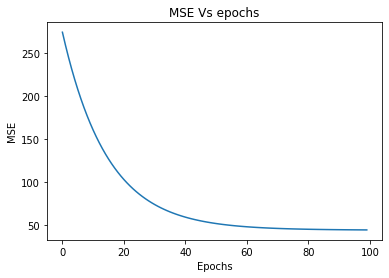

In [ ]:
import matplotlib.pyplot as plt

mse_values = list()
epochs_values = list()
lr = 0.03
w0 = 0; w1 = 2
for i in range(100):
  w0, w1, jw = gradient_descent_batch(X_train.values, y_train, w0, w1, lr)
  mse_values.append(jw)
  epochs_values.append(i)
  # print(jw)

plt.plot(epochs_values, mse_values)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title("MSE Vs epochs")
plt.show()

